# Árbol de Decisiones

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Importar el Clasificador
from sklearn.model_selection import train_test_split # Importar funciones de partición
from sklearn import metrics # Importar las métricas de scikit-learn

In [2]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
import os

In [3]:
df = pd.read_csv('rating-peliculas.csv')
df

,pelicula,genero,ratings-rotten,ratings-audiencia,costo-millones-usd,ano-estreno
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009
...,...,...,...,...,...,...
554,Your Highness,Comedy,26,36,50,2011
555,Youth in Revolt,Comedy,68,52,18,2009
556,Zodiac,Thriller,89,73,65,2007
557,Zombieland,Action,90,87,24,2009


In [4]:
df.describe()

,ratings-rotten,ratings-audiencia,costo-millones-usd,ano-estreno
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [5]:
y = df.genero
y.value_counts()

Comedy       172
Action       154
Drama        101
Horror        49
Thriller      36
Adventure     29
Romance       18
Name: genero, dtype: int64

In [6]:
len(y)

559

In [7]:
X = df.drop(['pelicula', 'genero'], axis = 1)

In [8]:
 # Dividir la muestra para poder probar el desempeño del modelo en 2 partes.
# Se divide en X y en Y. Esto es una parte de la base que el modelo nunca verá y que nos permitirá probar con más certeza el desempeño del modelo.
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.6, random_state = 1)

In [9]:
# clf = classifier
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred

array(['Drama', 'Drama', 'Action', 'Drama', 'Comedy', 'Action', 'Comedy',
       'Comedy', 'Drama', 'Comedy', 'Drama', 'Drama', 'Comedy', 'Drama',
       'Drama', 'Comedy', 'Drama', 'Drama', 'Action', 'Drama', 'Action',
       'Comedy', 'Comedy', 'Drama', 'Comedy', 'Comedy', 'Drama', 'Drama',
       'Drama', 'Comedy', 'Drama', 'Action', 'Drama', 'Comedy', 'Action',
       'Drama', 'Thriller', 'Comedy', 'Action', 'Comedy', 'Action',
       'Comedy', 'Drama', 'Comedy', 'Comedy', 'Drama', 'Drama', 'Action',
       'Action', 'Drama', 'Comedy', 'Drama', 'Comedy', 'Thriller',
       'Drama', 'Comedy', 'Comedy', 'Comedy', 'Drama', 'Drama', 'Drama',
       'Comedy', 'Comedy', 'Action', 'Drama', 'Action', 'Action', 'Drama',
       'Drama', 'Drama', 'Comedy', 'Comedy', 'Drama', 'Comedy',
       'Thriller', 'Comedy', 'Comedy', 'Action', 'Thriller', 'Comedy',
       'Comedy', 'Drama', 'Drama', 'Drama', 'Thriller', 'Comedy', 'Drama',
       'Action', 'Drama', 'Comedy', 'Drama', 'Drama', 'Action', '

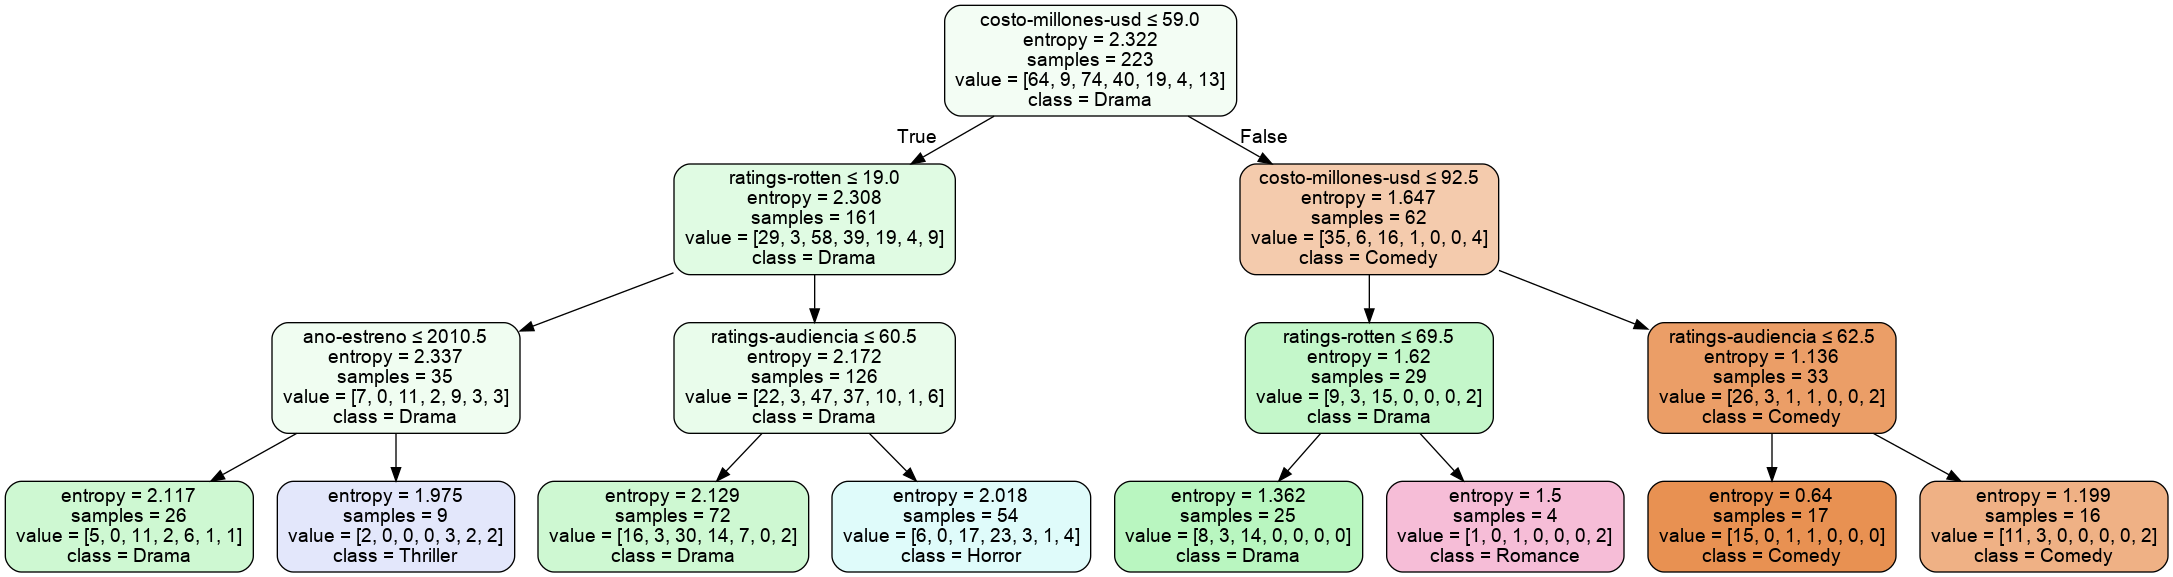

In [10]:
# StringIO nos va a permitir establecer las reglas del árbol de decisión que generamos en strings.
dot_data = StringIO()
# Después usamos la función export_graphviz, sobre él vamos a pasar el árbol de decisión entrenado y un outfile, que utilizará el dot_data generado anteriormente.
# filled y rounded son parámetros de visualización.
export_graphviz(clf, out_file = dot_data, filled = True, rounded = True,
                special_characters = True, feature_names = X.columns, class_names = y.value_counts().index)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Películas.png')
Image(graph.create_png())

In [11]:
metrics.accuracy_score(y_test, y_pred)

0.39285714285714285

Este modelo entrenado solo puede predecir correctamente un 39.3% de la variable aleatoria y, que es el genero de la película.